# Lecture 10 - Machine Learning and Deep Learning

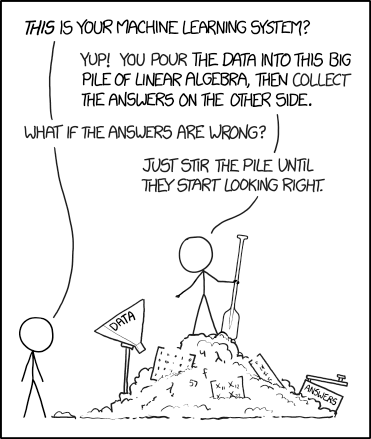
[xkcd/1838](https://xkcd.com/1838/)

## Contents Machine Learning Lectures 

1. **Today:** Introduction to Machine Learning and Deep Learning
2. Neural Differential Equations
3. Recurrent Neural Networks and Reservoir Computing
4. Neural Operators
5. Symbolic Regression

## Contents of this lecture
1. [Machine Learning](#machine-learning)<br>
    1.1. [Introduction](#intro)<br>
    1.2. [Supervised vs. Unsupervised Learning Algorithms](#algorithms)<br>
    1.3. [Optimisation for Machine Learning](#optimisation)<br>
    1.4. [Capacity, Overfitting and Underfitting](#capacity)<br>
    1.5. [Regularisation](#regularisation)<br>
    1.6. [Hyperparameters](#hyperparameters)<br>
    1.7. [Training, Validation, and Testing: A Complete Training Procedure for ML Models](#training)<br>
2. [Deep Learning](#deep-learning)<br>
    2.1. [Multilayer Perceptrons](#mlp)<br>
    2.2. [Activation Functions](#activation)<br>
    2.3. [The Universal Approximation Theorem](#univ)<br>
    2.4. [Gradient Descent](#gradient-descent)<br>
    2.5. [Backpropagation](#backprop)<br>
3. [Deep Learning in Julia](#dl-julia)<br>
    3.1. [Flux.jl](#flux)<br>
    3.2. [Example: Learning the XOR Function](#xor)<br>
4. [Further Reading](#further-reading)

In [ ]:
using Pkg
Pkg.activate(".")
Pkg.add(["Plots", "Flux", "Optimisers", "Random"]);

## 1. Machine Learning <a class="anchor" id="machine-learning"></a>

### 1.1. Introduction <a class="anchor" id="intro"></a>

- A useful working definition of machine learning could be:

> A machine learning algorithm is an algorithm that can learn from data.

- Yet what does it mean for an algorithm to "learn from data"? For a slightly more rigorous definition, [Mitchell (1997)](http://www.cs.cmu.edu/afs/cs.cmu.edu/user/mitchell/ftp/mlbook.html) provides the classic definition of learning:

> A computer program is said to learn from experience $E$ with respect to some class of tasks $T$ and performance measure $P$ if its performance at tasks in $T$, as measured by $P$, improves with experience $E$.

- Let's look a bit more closely at the different components of this definition:  

    - $E$: For a machine learning algorithm, **experience** consists of processing some data. The data experienced by an ML algorithm is often referred to as **training data**.


    - $T$: The exact nature of the **task** depends on the problem you're trying to solve, as we will see in this lecture.
    

    - $P$: The quantitative **performance measure** is usually known as the **cost function** or **loss function**. The aim of a machine learning algorithm is to minimise the loss function.<br>
  
- There are many different types of machine learning algorithms, and they can be classified based on the exact nature of $E$, $T$ and $P$.

### 1.2. Unsupervised vs Supervised Learning Algorithms <a class="anchor" id="algorithms"></a>
#### 1.2.1 Unsupervised Learning Algorithms <a class="anchor" id="algorithms"></a>

- Unsupervised learning algorithms **experience** a dataset consisting of **examples** $\mathbf x \in \mathbb{R}^n$, each of which consists of **features** $x_i$, $i = 1, \ldots, n$. 

- The **task** of the algorithm is to learn useful properties of the structure of the dataset. 

- For example, clustering algorithms divide the dataset into clusters of similar examples.

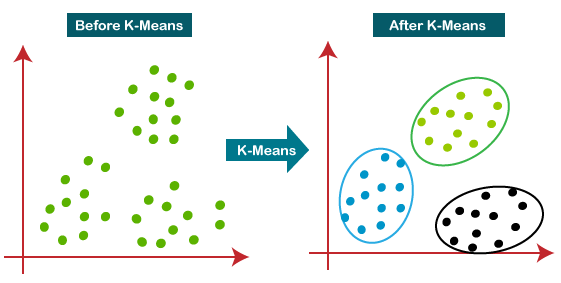
[Source](https://www.analyticsvidhya.com/blog/2021/04/k-means-clustering-simplified-in-python/)

- In this particular case, the **performance** is measured by the within-cluster sum of squares (WCSS), i.e. the variance,

$$\sum_{i=1}^{k} \sum_{\mathbf x \in S_i} \left\| \mathbf x - \boldsymbol\mu_i \right\|^2 = \sum_{i=1}^k |S_i| \operatorname{Var} S_i,$$

where $S_i$ is the set of points in the cluster $i$ and $\boldsymbol\mu_i$ is the mean of the points in $S_i$.

#### 1.2.2. Supervised Learning Algorithms

- Supervised learning algorithms also **experience** a dataset consisting of features $\mathbf x \in \mathbb{R}^n$, yet now each example is also associated with a **label** or **target**, $\mathbf y \in \mathbb{R}^m$. 

- The **task** of a supervised learning algorithm is to learn to predict the target $\mathbf{y}$ given the input $\mathbf{x}$.

- Two common categories of supervised learning algorithms are classification and regression:  

    - In a **classification** task, the machine learning algorithm is asked to specify which of $k$ categories some input belongs to, in which case the mapping to be learned is $f:\mathbb{R}^n \rightarrow {1,\ldots,k}$.  

    - In a **regression** task, the machine learning algorithm is asked to predict a numerical value given some input, in which case the mapping to be learned is $f:\mathbb{R}^n \rightarrow \mathbb{R}^m$.<br>

- For example, linear regression aims to predict the targets $\mathbf y$ as a linear function $\mathbf{\hat y} = f(\mathbf x) = \mathbf{\theta}^\mathrm T \mathbf x $ of the inputs.

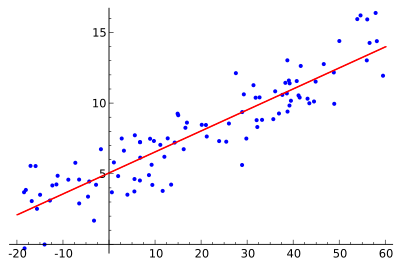
[Source](https://en.wikipedia.org/wiki/Linear_regression)

- In this case, the **performance** may measured by the mean-squared error (MSE),

$$L(\boldsymbol \theta) = \sum_{i=1}^{n} \left\| \mathbf y - \mathbf{\hat y} \right\|^2 = \sum_{i=1}^{n} \left\| \mathbf y - \boldsymbol{\theta}^\mathrm T \mathbf x \right\|^2.$$

- The objective of the algorithm is to find the parameters $\boldsymbol \theta^*$ which minimise the MSE,

$$\boldsymbol\theta^* = \underset{\boldsymbol{\theta}} {\operatorname{arg\,min}}  \sum_{i=1}^{n} \left\| \mathbf y - \mathbf{\hat y} \right\|^2 = \underset{\boldsymbol{\theta}} {\operatorname{arg\,min}}   \sum_{i=1}^{n} \left\| \mathbf y - \boldsymbol{\theta}^\mathrm T \mathbf x \right\|^2.$$

- The focus of this lecture will be on **deep learning models**, powerful supervised learning algorithms which can be used for both classification or regression problems, as well as other types of problems we haven't mentioned here.

### 1.3. Optimisation for Machine Learning <a class="anchor" id="optimisation"></a>

- Given a supervised learning task $\mathbf{\hat y} = f(\mathbf{x; \boldsymbol \theta})$, how do we find the parameters $\boldsymbol \theta^* = \underset{\boldsymbol{\theta}} {\operatorname{arg\,min}} \, L(\boldsymbol \theta)$ which minimise the loss function $L(\boldsymbol \theta)$?

- In certain straightforward cases, we can simply set the gradient of the loss function equal to zero and solve for the optimal parameters:

$$\nabla_{\boldsymbol \theta} L(\boldsymbol \theta^*) = \mathbf 0,$$

where $\nabla_{\boldsymbol \theta} = \left( \frac{\partial}{\partial\theta_1}, \ldots, \frac{\partial}{\partial\theta_n} \right)$ is the gradient operator.

- Doing this for linear regression (exercise), we get:

$$\boldsymbol{\theta^*} = (\mathbf X^\mathrm T\mathbf X)^{-1}\mathbf X^\mathrm T \mathbf y,$$

where $\mathbf X \in \mathbb{R}^{N \times (n+1)}$ is the **design matrix** describing our dataset, which contains $N$ training examples and $n$ features (the extra column is a constant, corresponding to the bias term in the linear regression).

- Therefore we can straightforwardly implement our first "machine learning" algorithm in Julia.

In [1]:
using LinearAlgebra

function linear_regression(X, y)
    return (X' * X) \ X' * y
end

linear_regression (generic function with 1 method)

- Note:
    - `'` is the transpose operator.  
    - `\(x, y)` is the left division operator, which multiplies `y` by the inverse of `x` on the left. There is also an equivalent right division operator, `/(x, y)`.<br><br>

- In more complex applications, where an analytic expression for $\boldsymbol \theta^*$ might not available, other strategies are required to find or estimate $\boldsymbol \theta^*$. One common optimisation strategy is **gradient descent**, which we will introduce later in the context of deep learning.

### 1.4. Capacity, Overfitting and Underfitting <a class="anchor" id="capacity"></a>

- For a machine learning model to be useful, it must be able to **generalise** effectively to new inputs it didn't see during training.

- We define the **generalisation error**, or **test error**, as the expected value of the model error on an unseen input.

- Generally speaking, there are two ways in which a model can have a large generalisation error:  

    1. **Underfitting**: The model is unable to sufficiently reduce the training error.  
    2. **Overfitting**: The model is able to reduce the training error but there remains a large gap between the training error and the test error.<br><br>

- We can control whether a model is more likely to overfit or underfit by altering its **capacity**.

- Roughly speaking, a model's capacity is the size of the set of functions it is able to approximate.

- Models with low capacity may struggle to fit the training set - **underfitting**.

- Models with high capacity may simple memorise irrelevant properties of the training set (e.g., noise) which do not reflect the underlying data-generating distribution - **overfitting**.

- One way to control the capacity of a learning algorithm is to choose its **hypothesis space**, the set of functions that the learning algorithm is allowed to select as being the solution. For example, the hypothesis space of a linear regression model is the set of all linear functions of its input.

- To illustrate the effect of model capacity on machine learning models, let's try to learn the function $y = \sin(x)$.

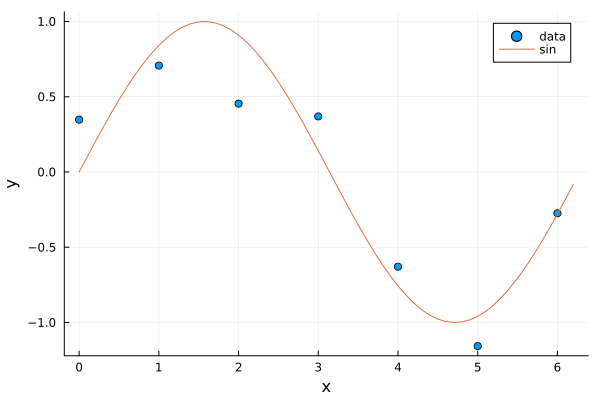

In [3]:
using Plots

# Generate noisy training data
x = collect(0:1:2π)
y = sin.(x) .+ 0.25 * randn(length(x))

plt = scatter(x, y, label = "data", xlabel = "x", ylabel = "y")
plot!(plt, sin, 0:0.1:2π, label = "sin")

- We will attempt to fit the data using a polynomial of degree $M$,

$$y(x,\mathbf\theta) = \theta_0 + \theta_1 x + \theta_2 x^2 + \ldots + \theta_M x^M = \sum\limits_{i=0}^M \theta_i x^i$$

- This is an example of **feature engineering**, in which we train our machine learning model not on the input $\mathbf x$ itself, but on some transformed input $\phi(\mathbf x)$, in this case a nonlinear transformation to higher-order polynomials.

- Note that the model itself is still linear in the parameters, even though it can now fit nonlinear functions. Therefore we can still use linear regression.

- The parameter $M$, the degree of the polynomial, controls the capacity of our model, since for higher values of $M$ we can fit a larger family of functions.

In [4]:
using Statistics

"""
    make_X(x, M)

Given a vector of scalar inputs x, create a design matrix X, in which 
each row contains the transformed input [1, x, x², ..., xᴹ].
"""
function make_X(x, M)
    X = x.^0
    for n in 1:M
        X = [X x.^n]
    end
    return X
end

"""
    polynomial(x, θ)

Given a scalar x and parameters θ of a polynomial function of degree M,
evaluate θ₀ + θ₁x + ... + θₘxᴹ.
"""
function polynomial(x, θ)
    M = length(θ) - 1
    X = make_X(x, M) 
    return dot(θ, X)
end

"""
    fit_and_plot_polynomial!(plt, x, y, M)

Given a vector x of scalar inputs and a vector y of scalar outputs,
fit and plot a polynomial of degree M.
"""
function fit_and_plot_polynomial!(plt, x, y, M)
    # 1. Create the design matrix X
    X = make_X(x, M)
    
    # 2. Fit polynomial
    θ = linear_regression(X, y)
    f = x -> polynomial(x, θ)
    
    # 3. Print MSE
    y_hat = f.(x)
    mse = mean((y .- y_hat).^2)
    println("MSE = ", mse)
    
    # 4. Plot the fitted curve
    x = collect(0:0.1:6)
    plot!(plt, f, x, label = "M = $M")
end

fit_and_plot_polynomial!

MSE = 0.39535228216751583


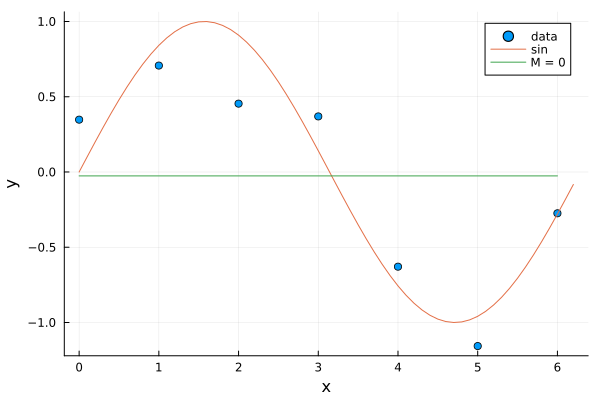

In [5]:
fit_and_plot_polynomial!(plt, x, y, 0)

MSE = 0.16788295791456687


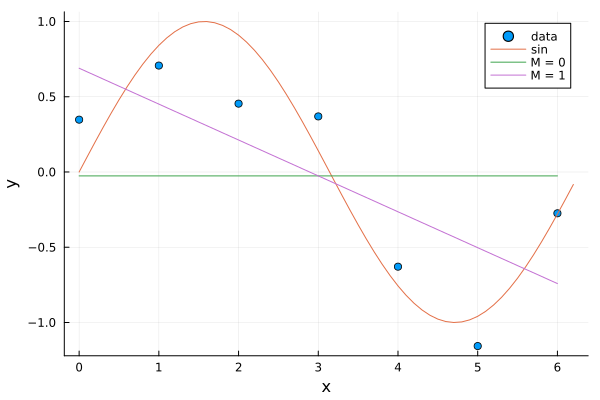

In [6]:
fit_and_plot_polynomial!(plt, x, y, 1)

MSE = 0.16729955901159183


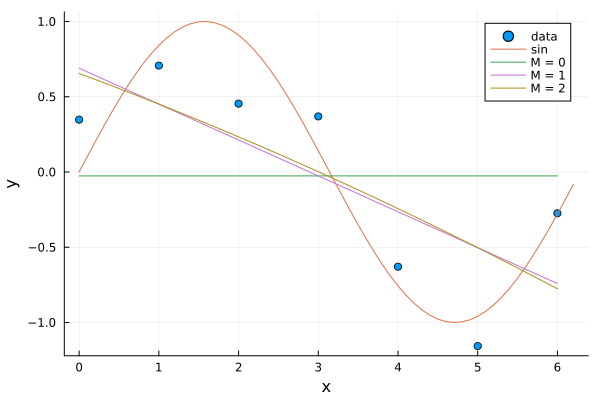

In [7]:
fit_and_plot_polynomial!(plt, x, y, 2)

MSE = 0.038628586585605515


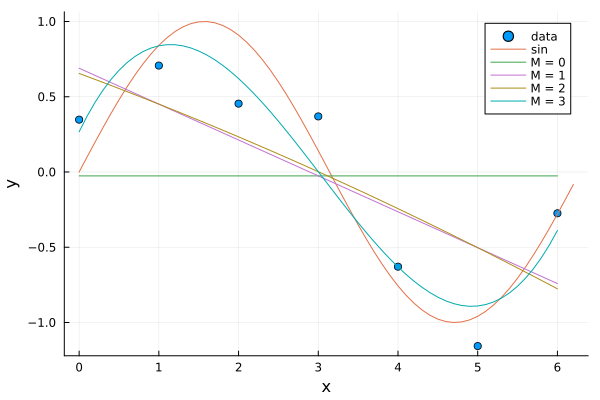

In [8]:
fit_and_plot_polynomial!(plt, x, y, 3)

MSE = 3.1482568413341334e-21


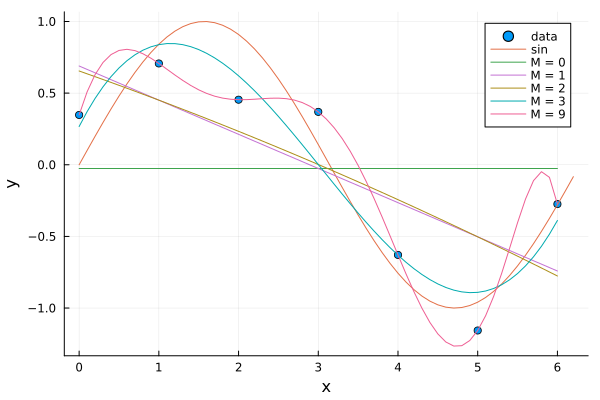

In [9]:
fit_and_plot_polynomial!(plt, x, y, 9)

- For low values of $M$, we are underfitting the model, since it does not possess sufficient capacity to fit the training data.

- For intermediate values of $M$, the model appears to have an appropriate capacity, learning a function that somewhat resembles the target curve $y = \sin(x)$.

- For large values of $M$, we are overfitting the model, since it learns an arbitrary function with zero error which will likely not generalise well to unseen data.

- In general, the **optimal capacity** of a machine learning algorithm is the one which minimises the generalisation error.

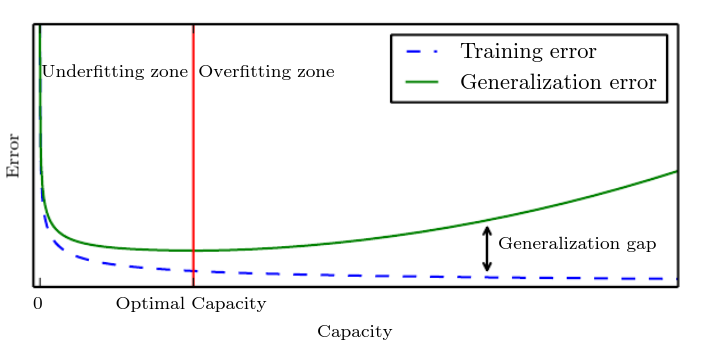
[Source](https://www.deeplearningbook.org/)

### 1.5. Regularisation  <a class="anchor" id="regularisation"></a>

- **Regularisation** is any modification we make to a learning algorithm that is intended to reduce its generalisation error but not its training error.

- As well as choosing the model's hypothesis space, we can also give the algorithm a preference for one solution over another within its hypothesis space. That is, if two solutions are eligible for the given dataset, the model will choose the preferred solution.

- For example, we can include a preference for smaller values for our model's parameters. This is known in machine learning as **weight decay**.

- An $L^1$ norm takes the form,

$$L(\mathbf \theta) = \mathrm{MSE_{\mathrm train}} + \lambda \|{\mathbf\theta}\|,$$

where $\lambda$ is a parameter controlling the strength of our preference for smaller weights.

- An $L^2$ norm takes the form,

$$L(\mathbf \theta) = \mathrm{MSE_{\mathrm train}} + \lambda \|{\mathbf\theta}\|^2.$$

- Building in a preference for certain solutions via regularisation is one of the main methods by which machine learning practitioners incorporate domain knowledge, or priors, into the training of machine learning models.

- Let's return to our earlier example of fitting a 9-th order polynomial to a noisy $\sin$ function, this time adding an $L^2$ norm. Linear regression with an $L^2$ norm is known as **ridge regression** and also has a closed form solution,

$$\mathbf{\theta^*} = (\mathbf X^\mathrm T\mathbf X + \lambda \mathbf I)^{-1}\mathbf X^\mathrm T \mathbf y.$$

In [10]:
function ridge_regression(X, y, λ)
    return (X' * X + λ * I) \ X' * y
end

ridge_regression (generic function with 1 method)

In [11]:
"""
    fit_and_plot_ridge(x, y, λ)

Given a vector x of scalar inputs and a vector y of scalar outputs,
fit and plot a polynomial of degree 9 with an L2 norm controlled by
the parameter λ.
"""
function fit_and_plot_ridge(x, y, λ)
    plt = scatter(x, y, label = "data", xlabel = "x", ylabel = "y")

    # 1. Create the design matrix X
    X = make_X(x, 9)
    
    # 2. Fit polynomial
    θ = ridge_regression(X, y, λ)
    f = x -> polynomial(x, θ)
    
    # 3. Print loss
    loss = mean((y .- f.(x)).^2)
    println("Loss = ", loss)
    
    # 4. Plot the fitted curve
    x = collect(0:0.1:6)
    plot!(plt, f, x, label = "λ = $λ")
end

fit_and_plot_ridge

Loss = 3.1482568413341334e-21


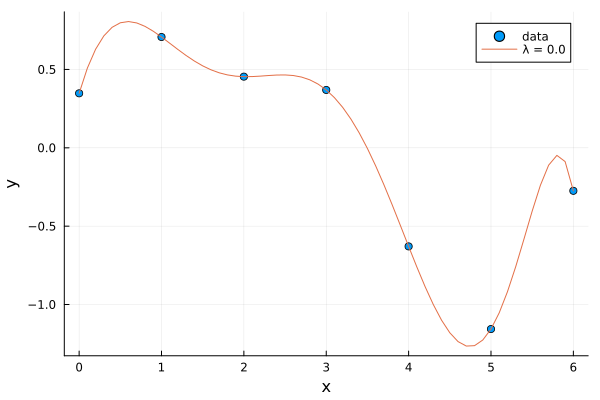

In [12]:
fit_and_plot_ridge(x, y, 0.0)

Loss = 0.010330981475896563


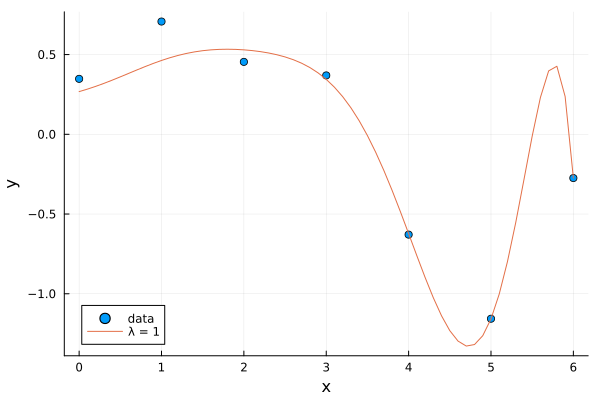

In [15]:
fit_and_plot_ridge(x, y, 1)

Loss = 0.15012652315828356


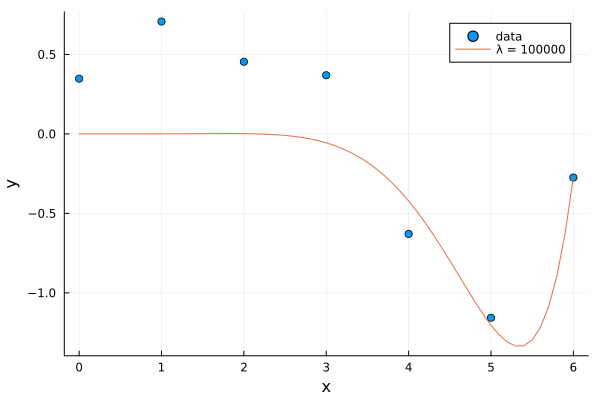

In [20]:
fit_and_plot_ridge(x, y, 100000)

### 1.6. Hyperparameters <a class="anchor" id="hyperparameters"></a>

- So far, we have denoted by $\boldsymbol \theta$ the parameters of the machine learning model which are optimised by the learning algorithm. In the case of our polynomial regression model, the parameters $\boldsymbol \theta$ are the polynomial coefficients.

- Most machine learning algorithms also possess **hyperparameters**, which we will denote by $\boldsymbol \Theta$.

- You can think of hyperparameters as **settings** for the machine learning model. 

- For example, in the earlier example, the parameter $M$, the degree of the polynomial, is a hyperparameter of the model.

- In the case of weight decay, the parameter $\lambda$ is also a hyperparameter.

- Hyperparameters also need to be optimised, and this is done in the validation phase of training, separately from the optimisation of $\boldsymbol \theta$.  

### 1.7. Training, Validation, and Testing: A Complete Training Procedure for ML Models <a class="anchor" id="training"></a>

- Suppose we have a dataset of pairwise samples $S = \{(\mathbf x_i, \mathbf y_i) : 1 \leq i \leq N\}$, with $\mathbf x_i \in \mathbb R^n$, $\mathbf y_i \in \mathbb R^m$. The dataset corresponds to some unknown data-generating function $\boldsymbol f^* : \mathbf x \to \mathbf y$. 

- We wish to approximate the true data-generating function $\boldsymbol f^* $ with a machine learning model $\boldsymbol f(\boldsymbol \theta, \boldsymbol \Theta)$. How do we go about finding the optimal values of both $\boldsymbol \theta$ and $\boldsymbol \Theta$?

- Typically, we begin by splitting $S$ into three disjoint sets:
    1. A **training set** $S_\mathrm{train}$, with $N_\mathrm{train}$ samples, which is used to optimise $\boldsymbol \theta$.
    2. A **validation set** $S_\mathrm{val}$, with $N_\mathrm{val}$ samples, which is used to optimise $\boldsymbol \Theta$.
    3. A **test set** $S_\mathrm{test}$, with $N_\mathrm{test}$ samples, which is used to estimate the generalization error of the optimised model.<br><br>
     
- The appropriate split will strongly depend on the model and application, but a typical train-valid-test split could be around 70-15-15.  

- The three datasets then correspond to the three phases of training a machine learning model:

    1. **Training phase**: The training set is used to optimise $\boldsymbol{\theta}$, e.g., via gradient descent, for a given $\boldsymbol \Theta$. In other words,
    
    $$\boldsymbol \theta^* = \underset{\boldsymbol{\theta}} {\operatorname{arg\,min}} \,L_\mathrm{train}(\boldsymbol \theta, \boldsymbol \Theta),$$

    where $L_\mathrm{train}$ is the loss evaluated on the training set.

    2. **Validation phase**: The validation set is used to compare different options for the hyperparameters $\boldsymbol \Theta$. For each $\boldsymbol \Theta$, we take $\boldsymbol \theta^*$ from the training phase and evaluate each model on the validation set. The optimal hyperparameters $\boldsymbol{\Theta^*}$ are then,

    $$\boldsymbol \Theta^* = \underset{\boldsymbol{\Theta}} {\operatorname{arg\,min}} \,L_\mathrm{val}(\boldsymbol \theta^*(\boldsymbol{\Theta}), \boldsymbol \Theta),$$
    
    where $L_\mathrm{val}$ is the loss evaluated on the validation set, and we write $\boldsymbol \theta^*(\boldsymbol{\Theta})$ to emphasise that we will in general have a different $\boldsymbol \theta^*$ for each choice of $\boldsymbol{\Theta}$.

    3. **Test phase**: Finally, given $\boldsymbol \theta^*$ and $\boldsymbol \Theta^*$ - a fully optimised model - we use the test set to estimate the generalisation error of the model by evaluating $L_\mathrm{test}(\boldsymbol \theta^*, \boldsymbol \Theta^*)$.

## 2. Deep Learning <a class="anchor" id="deep-learning"></a>

### 2.1. Multilayer Perceptrons <a class="anchor" id="mlp"></a>

- In this lecture we will focus on the quintessential deep learning model: **multilayer perceptrons (MLPs)**, also known as **deep feedforward networks**.

- While immensely powerful in their own right, MLPs also form the basis for the most sophisticated deep learning architectures, for example, ChatGPT.

- An MLP defines a mapping $\mathbf y = f(\mathbf x; \boldsymbol \theta)$, with $\mathbf x \in \mathbb{R}^n$, $\mathbf y \in \mathbb{R}^m$, and parameters $\boldsymbol \theta$.

- The goal of an MLP is generally to approximate some function $f^*(\mathbf x)$. We attempt to learn the parameters $\mathbf \theta$ which result in the best approximation $f(\mathbf x; \mathbf \theta)$ of $f^*(\mathbf x)$.

- MLPs consist of **nodes** arranged into **layers**. 

- As an example, we begin with a **fully-connected** network; every node in a given layer is connected to all of the nodes in the previous layer.

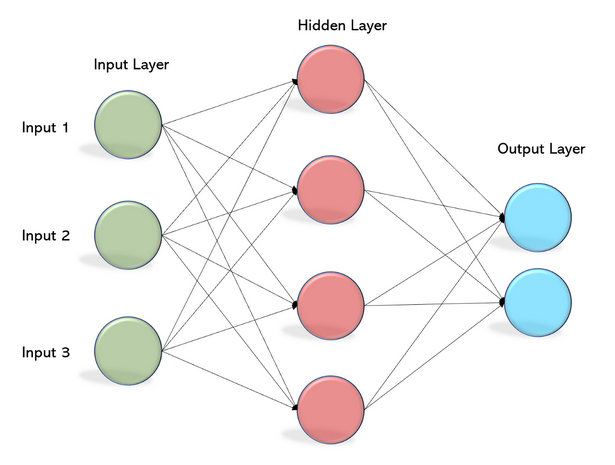
[Source](https://becominghuman.ai/multi-layer-perceptron-mlp-models-on-real-world-banking-data-f6dd3d7e998f)

- The first layer of an MLP is called the **input layer**, the final layer is called the **output layer**, and all intermediate layers are called **hidden layers**. This MLP has a single hidden layer, but in general we can have many - that is where the name deep learning comes from.

- Each circle in the picture is a node. For a given input $\mathbf x$ and parameters $\boldsymbol \theta$, every node in the network is associated with a real-valued number - its **activation**.

- Given an $\mathbf x$, the data flows through the network from left to right, with the activation of each node being calculated as a function of all the nodes in the previous layer. This is why these networks are sometimes called deep feedforward networks.

- The activation of a single node is calculated as a function of the form,

$$\sigma(\mathbf z^{\mathrm T} \mathbf w + b),$$

where $\mathbf z$ are the activations of the previous layer, $\mathbf w$ are the **weights** of the node, which control the contribution of each node in the previous layer to this node, $b$ is the **bias** of the node, and $\sigma$ is an activation function, which is almost always nonlinear.

- We can therefore think of the activation of a single neuron in the network as an affine transformation $A = \mathbf z^{\mathrm T} \mathbf w + b$ for the activations in the previous layer, followed by a nonlinear transformation $\sigma$.

- More succintly, we can write the weights for an entire layer as a matrix $\mathbf W$ and the biases as a vector $\mathbf b$, thereby computing the activations of the entire layer as,

$$\sigma(\mathbf z^{\mathrm T} \mathbf W + \mathbf b),$$

where the activation function $\sigma$ is now applied element-wise.

- In fact, we can think of the entire network $f: \mathbb R^n \to \mathbb R^m$ as a composition of alternating affine transformations and component-wise activations,

$$f(\mathbf x) = A^{(L+1)} \circ \sigma \circ A^{(L)} \circ \cdots \circ \sigma \circ A^{(1)}(\mathbf x),$$

where $L$ is the number of hidden layers and $A^{(i)}$ is the affine transformation corresponding to the layer $i$.

- More intuitively, we can think of the early layers of an MLP as learning a nonlinear transformation $\phi(\mathbf x)$ of the input $\mathbf x$, before fitting a linear model to the transformed input. That is, neural nets remove much of the difficult work of manual feature engineering, as we did for our earlier polynomial example.

### 2.2. Activation Functions <a class="anchor" id="activation"></a>

- The activation function $\sigma$ is a crucial part of the MLP architecture.

- $\sigma$ is usually nonlinear, and indeed it must be nonlinear if we wish to approximate a nonlinear function with our MLP. If we chose a linear activation function, then the capacity of the MLP would be limited to affine transformations of the input.

- Here are some common choices for the activation function:

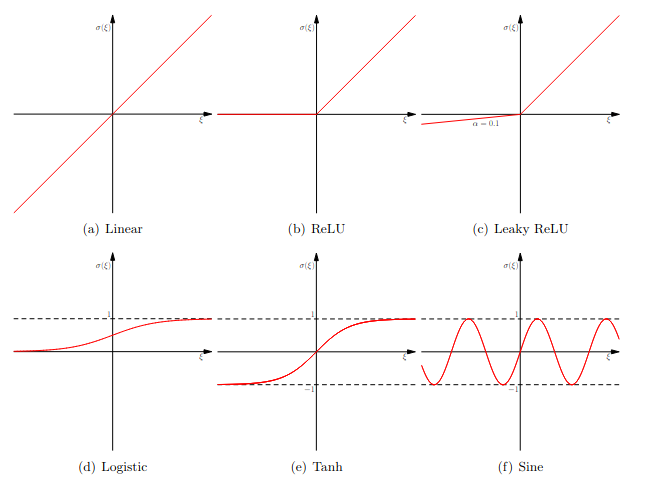
[Source: Figure 2.2 from Deep Learning and Computational Physics (Ray et al. 2023)](https://arxiv.org/abs/2301.00942)
<br>
<br>

- $\mathrm{ReLU}(x) = \mathrm{max}(0, x)$ is a common default and a good choice for most applications.

- Perhaps we can also now appreciate why deep learning models are commonly referred to as **neural networks**. Analogous to neurons in the brain, every "neuron" (node) in the network takes inputs from many other "neurons", and then "activates" or "fires" when some function of those inputs is above a certain threshold.

### 2.3. The Universal Approximation Theorem <a class="anchor" id="univ"></a>

- What's so special about MLPs? 

- According to [Goodfellow et al. 2016](https://www.deeplearningbook.org/),

> The **universal approximation theorem** (Hornik et al., 1989; Cybenko, 1989) states that a feedforward network with a linear output layer and at least one hidden layer with any “squashing” activation function (such as the logistic sigmoid activation function) can approximate any Borel measurable function from one ﬁnite-dimensional space to another with any desired nonzero amount of error, provided that the network is given enough hidden units.

- Or, in simpler terms, from [Murphy 2022](https://probml.github.io/pml-book/book1.html),

> An MLP with one hidden layer is a **universal function approximator**, meaning it can model any suitably smooth function, given enough hidden units, to any desired level of accuracy.

- Therefore, given *any* suitably smooth function, there exists an MLP which can approximate this function to arbitrary accuracy. **MLPs are incredibly powerful function approximators!**

- More recent results generalise this to the case of arbitrary depth networks; see [Wikipedia](https://en.wikipedia.org/wiki/Universal_approximation_theorem) for a good overview.

- Unfortunately, knowing that an MLP is able to effectively approximate almost any function does not mean that we can straightforwardly find the network and parameters corresponding to that function. The central task of deep learning research is effectively designing and efficiently training neural networks, that is, finding the parameters which correspond to the transformation we are trying to learn.

### 2.4. Gradient Descent <a class="anchor" id="gradient-descent"></a>

- Given an MLP, how then do we find the MLP parameters $\boldsymbol \theta^*$ which minimise the loss function $L(\boldsymbol \theta)$?

- It is useful to consider a geometrical interpretation of $L(\boldsymbol \theta)$ as a surface in the **weight space** or **parameter space** defined by the parameters $\boldsymbol \theta$. For example, in a two-dimensional parameter space the loss surface might look something like this:

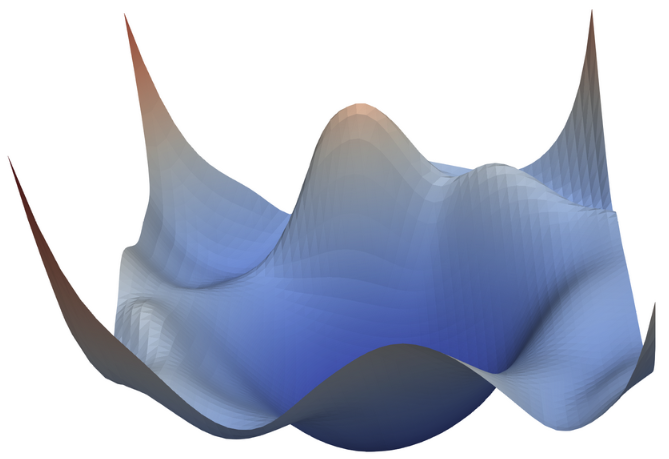
[Source](https://www.cs.umd.edu/~tomg/projects/landscapes/)
<br>

- Given some initial value of the parameters $\boldsymbol \theta$, we wish to make an update $\boldsymbol \theta \leftarrow \boldsymbol \theta + \Delta \boldsymbol{\theta}$ which will reduce $L(\boldsymbol \theta)$. The goal then is to find an appropriate parameter update $\Delta \boldsymbol{\theta}$.

- It can be shown (using the directional derivative, exercise) that the gradient of the loss function, 

$$\nabla_{\mathbf \theta} L(\boldsymbol \theta) = \left( \frac{\partial L}{\partial\theta_1}, \ldots, \frac{\partial L}{\partial\theta_n} \right)$$

points "uphill" on the loss surface, i.e., in the direction of the greatest rate of increase of the loss function.

- Therefore, given some initial value of the parameters $\mathbf \theta$, we can aim to decrease $L(\mathbf \theta)$ by moving in the steepest "downhill" direction on the loss surface, i.e. in the direction of the negative gradient,

$$\Delta \boldsymbol{\theta} = -\eta \nabla_{\boldsymbol \theta}L(\boldsymbol \theta),$$

where $\eta \geq 0$ is the **learning rate** or **step size**.

- This technique is known as **gradient descent**.

- Gradient descent therefore iteratively proposes new values for the parameters, 

$$\mathbf \theta' = \mathbf \theta - \eta \nabla_{\mathbf \theta} L(\mathbf \theta),$$

stepping downhill on the loss surface until we converge to a minimum of the loss.

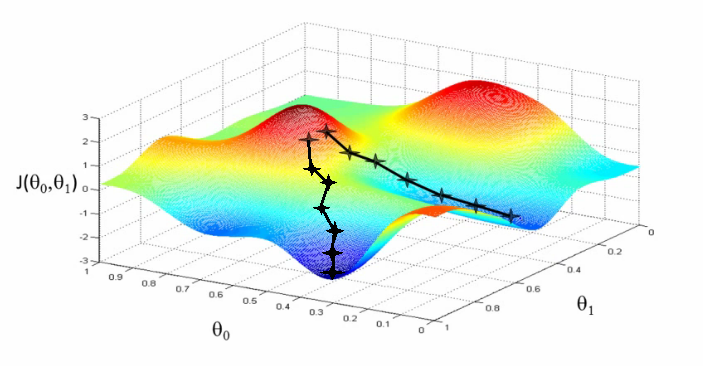
<br>

- As you can see, the exact local minimum to which gradient descent converges depends on the initial values of the parameters $\mathbf \theta$.  In practice, and especially for very complicated loss landscapes, finding the global minimum will be intractable and we are often satisfied with a sufficiently good local minimum. Avoiding bad local minima is one of the central challenges of optimising deep learning algorithms.

- Choosing the optimal value of $\eta$ can be a significant challenge when training machine learning algorithms:<br>
    - If $\eta$ is too small, we may get stuck in an undesirable local minimum early in the training process, or training may take too long to converge.
    - If $\eta$ is too large, we may "step over" the desired local minimum, or training may diverge altogether.<br><br>
<br>

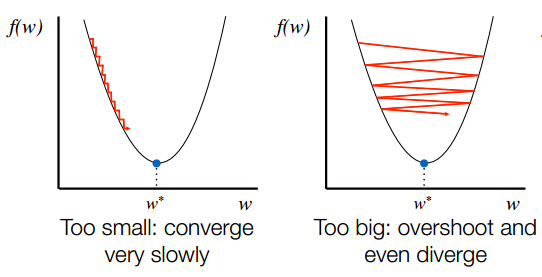
[Source](https://dunglai.github.io/2017/12/21/gradient-descent/)
<br>

- $\eta$ is therefore an important hyperparameter of your training algorithm which needs to be optimised.

- The gradient descent algorithms which are most commonly used in practice include some modifications to this basic procedure, including momentum, e.g. [Nesterov momentum](https://fluxml.ai/Flux.jl/stable/training/optimisers/#Flux.Optimise.Nesterov), and adaptive learning rates, e.g. [Adam](https://fluxml.ai/Flux.jl/stable/training/optimisers/#Flux.Optimise.Adam).

- Adam is a good default choice for most applications.

### 2.5. Backpropagation <a class="anchor" id="backprop"></a>

- To train our MLP with a gradient-based optimisation algorithm, we still need gradients of the cost function with respect to the model parameters, i.e., $\nabla_\theta L(\mathbf \theta)$.

- We can compute the derivative of the loss with respect to any given parameter (weight or bias) of the network by systematically applying the **chain rule of partial differentiation**.

- As a quick reminder, for scalar functions $y = g(x)$ and $z = f(g(x)) = f(y)$, the chain rule of differentiation states that

$$\frac{dz}{dx} = \frac{dz}{dy}\frac{dy}{dx}.$$

- Generalising to vector functions, such that $\mathbf x \in \mathbb R^n$, $\mathbf y \in \mathbb R^m$, $g : \mathbb R^n \to \mathbb R^m$, and $f : \mathbb R^m \to \mathbb R$, the chain rule of partial differentiation states that

$$\frac{\partial z}{\partial x_i} = \sum_j \frac{\partial z}{\partial y_j}\frac{\partial y_j}{\partial x_i}.$$

- Therefore, taking $z$ as our scalar loss and $x_i$ as any parameter of our MLP, we can straightforwardly calculate the $\frac{\partial z}{\partial x_i}$ by repeated application of the chain rule.

- As a concrete example, let us consider a two-layer MLP with a vector as an input and a scalar as an output, where  
    - $\alpha_{ij}$ are the parameters of the first layer,
    - $\beta_i$ are the parameters of the second layer (scalar output layer with no activation function),
    - Neither layer has bias parameters, without loss of generality.<br><br>

- The output of this MLP for the $j$-th data sample is then
$$\begin{align}\hat{y}_j &= \sum_i \beta_i h^{(1,j)}_i \end{align},$$
where $h^{(1,j)}_i$ is the output (activation) of the $i$-th node of the first, hidden layer given input $x_j$.

- Given a MSE loss function $L(\hat{y}_j)$ the derivatives with respect to the parameters of the second layer $\partial L/\partial\beta_i$ can be computed by applying the chain rule,

$$\begin{align}
\frac{\partial L}{\partial\beta_i} = \sum_j \frac{\partial L}{\partial\hat{y}_j}\frac{\partial\hat{y}_j}{\partial\beta_i} = \sum_j -2( y_j - \hat{y}_j)h^{(1,j)}_i = \sum_j \delta_j h^{(1,j)}_i
\end{align}$$

where we define $\delta_j = \partial L / \partial\hat{y}_j = -2( y_j - \hat{y}_j)$. 
<br>

- The derivatives with respect to the first layer follow by applying the chain rule once more as<br><br>
$$\begin{align}
\frac{\partial L}{\partial\alpha_{ik}} = \sum_j\frac{\partial L}{\partial\hat{y}_j}\frac{\partial\hat{y}_j}{\partial h^{(1,j)}_i}\frac{\partial h^{(1,j)}_i}{\partial\alpha_{ik}} = \sum_j -2( y_j - \hat{y}_j)\beta_i\frac{\partial \sigma(x)}{\partial x}x_{j} = \sum_j \delta_j\beta_i\frac{\partial \sigma(x)}{\partial x}x_{j}. \nonumber
\end{align}$$
<br>

- The first two factors are the error $\delta_j$ which has already been computed in the previous step, weighted by $\beta_i$, the weights of the second layer, which can be interpreted as the error due to node $i$ of the second layer.

- The errors of the MLP are thus propagated backwards by repeatedly applying the chain rule, allowing the gradients of the loss function to be efficiently computed using a single backwards pass through the neural net. Hence this algorithm is named backpropagation.

- Backpropagation is a special case of [reverse-mode automatic differentiation](https://en.wikipedia.org/wiki/Automatic_differentiation#Reverse_accumulation), which is in turn a special case of [automatic differentiation](https://en.wikipedia.org/wiki/Automatic_differentiation) (AD), a technique for computing derivatives of arbitrary computer programs by tracking elementary operations and applying the chain rule.

- AD is neither symbolic differentiation nor numerical differentiation. We don't get a symbolic formula out of AD, but in contrast to numerical finite difference schemes that we learned about earlier in the lecture, AD returns exact gradients/derivatives! 

## 3. Deep Learning in Julia <a class="anchor" id="dl-julia"></a>

### 3.1. Flux.jl <a class="anchor" id="flux"></a>

- [Flux.jl](https://fluxml.ai/Flux.jl/stable/) is the main deep learning library for the Julia programming language.

- It is "batteries-included", meaning it contains everything you need to build and train a wide variety of deep learning algorithms, for example:
    - High level interfaces for constructing neural network layers, such as `Dense` for a densely connected layer, which can be chained together using `Chain` to form a complete MLP.
    - A variety of loss functions in the `Flux.Losses` module.
    - An automatic differentiation library [Zygote.jl](https://fluxml.ai/Zygote.jl/stable/) for computing gradients of loss functions with respect to the model parameters (backpropagation).
    - A large range of optimisers, for example `Adam` and `RMSProp`. These were formerly in the `Flux.Optimise` module, now they are in their own package [Optimisers.jl](https://fluxml.ai/Optimisers.jl/dev/).
    - High-level methods for training neural networks, such as `train!`, as well as low-level utilities for when you require more flexibility and control over the training procedure.<br><br>

- Flux.jl also contains everything you need to build and train more complex neural networks than we will encounter in this lecture, for example convolutional neural networks and recurrent neural networks.

- For a range of examples of deep learning using Flux.jl, see the [model zoo](https://github.com/FluxML/model-zoo/).

### 3.2. Example: Learning the XOR Function <a class="anchor" id="xor"></a>

- To develop our intuition for MLPs, we will attempt to learn the XOR ("exclusive or") function.

- The XOR function takes two binary values, $x_1$ and $x_2$, and returns 1 if exactly one of them is equal to 1, and 0 otherwise. Its truth table is:

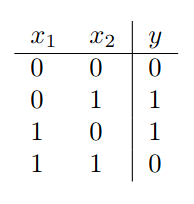

In [ ]:
function XOR(x1, x2)
    return x1 != x2 ? 1 : 0  # ternary operator
end

- We can already see that we won't be able to learn this function with a linear model.

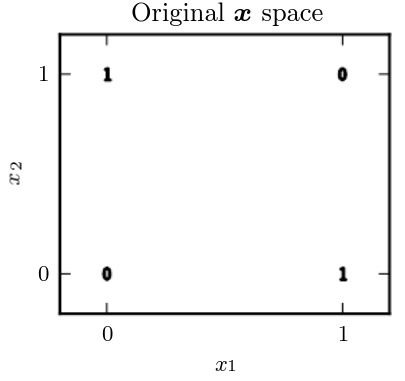
[Source](https://www.deeplearningbook.org/)
<br>
- Therefore, let's try to use an MLP with a single hidden layer to learn a nonlinear model of the XOR function.

- Flux.jl provides the `Dense` constructor for creating neural network layers. Under the hood, a dense layer is simply a struct with the fields `weight` and `bias`.

- Similarly, Flux.jl provides the `Chain` constructor for composing multiple layers to form a network.

In [21]:
using Flux

hidden_layer = Dense(2, 2, relu)  # nonlinear
output_layer = Dense(2, 1)        # linear

mlp = Chain(
    hidden_layer,
    output_layer,
)

Chain(
  Dense(2 => 2, relu),                  # 6 parameters
  Dense(2 => 1),                        # 3 parameters
)                   # Total: 4 arrays, 9 parameters, 244 bytes.

- The MLP we have created may be represented as follows (the two diagrams are equivalent representations of the network):

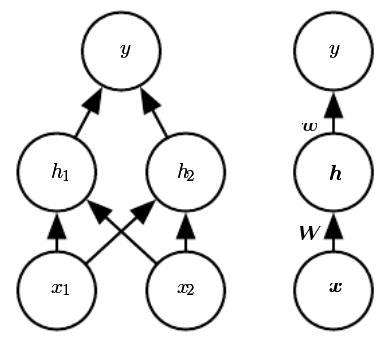
[Source](https://www.deeplearningbook.org/)

In [22]:
# Training data
X = [[0, 0] [0, 1] [1, 0] [1, 1]] .|> Int32
y = [0 1 1 0].|> Int32

1×4 Matrix{Int32}:
 0  1  1  0

- What is the output of our MLP?

In [31]:
mlp(X)

1×4 Matrix{Float32}:
 0.0  0.0  0.0  0.0

- Of course this is incorrect, since the MLP was initialised with random weights and biases. But we can see that our MLP can simply be called as a function of the model inputs.

- Let's now (manually) alter the weights and biases of the hidden layer. In Flux.jl, they are part of every layer's struct: 

In [32]:
hidden_layer.weight[:] = [1 1; 1 1]
hidden_layer.bias[:] = [0, -1];

- What is the effect of this new hidden layer on our inputs?

In [34]:
X

2×4 Matrix{Int32}:
 0  0  1  1
 0  1  0  1

In [33]:
hidden_layer(X)

2×4 Matrix{Float32}:
 0.0  1.0  1.0  2.0
 0.0  0.0  0.0  1.0

In [35]:
y

1×4 Matrix{Int32}:
 0  1  1  0

- Each column of this matrix is a vector $\mathbf h = (h_1, h_2)^{\mathrm T}$ containing the activations of the two nodes in the hidden layer, one for each of the four inputs $\mathbf x = (x_1, x_2)^{\mathrm T}$.

- Plotting the hidden layer activations along with the target $y$:

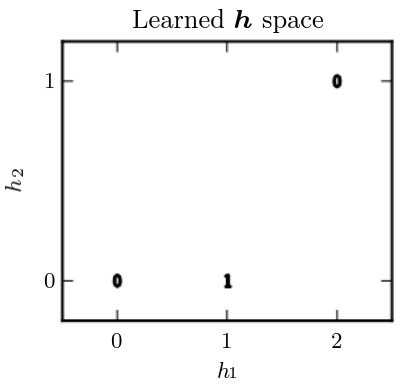
[Source](https://www.deeplearningbook.org/)
<br>

- The number in the plot is $y$, and the two axes are the two different neurons in the first/hidden layer $h_1$ and $h_2$

- The effect of this hidden layer is to transform our input data to a new feature space, in which both of the examples with output $y = 1$ have been mapped to the point $\mathbf h = (1, 0)^{\mathrm T}$.

- In fact, $h_1 = x_1 \,\mathrm{OR}\, x_2$ and $h_2 = x_1 \,\mathrm{AND}\, x_2$.

- From this new feature space, we can now model the XOR function as a linear model which is increasing in $h_1$ and decreasing in $h_2$.

- By setting the weights of the output layer appropriately, we can complete the model.

In [36]:
output_layer.weight[:] = [1, -2]
output_layer.bias[:] = [0];

In [37]:
mlp(X)

1×4 Matrix{Float32}:
 0.0  1.0  1.0  0.0

In [38]:
y

1×4 Matrix{Int32}:
 0  1  1  0

- The output layer now computes $x_1 \,\mathrm{XOR}\, x_2 = (x_1 \,\mathrm{OR}\, x_2) \,\mathrm{ AND }\,\mathrm{NOT}\, (x_1 \,\mathrm{AND}\, x_2)$.

- We've successfully "trained" an MLP to reproduce the XOR function!

- In this example we knew the weights we needed to approximate the target function. What if we hadn't known the correct weights in advance, as is generally the case? In that case, we need to train the model via gradient descent.

- Flux provides the useful high-level `train!` function which computes the gradient of the given loss function and updates the parameters according to the provided optimisation rule.

In [39]:
using Optimisers

function train_XOR(X, y; learning_rate = 0.01, epochs = 1000)
    # Initialise the model
    hidden_layer = Dense(2, 2, relu)  # nonlinear
    output_layer = Dense(2, 1)        # linear
    model = Chain(
        hidden_layer,
        output_layer,
    )

    # Define a loss function with signature (model, input, target)
    loss(m, X, y) = Flux.mse(m(X), y)  # You might add a regulariser here

    # Set up an optimiser 
    opt_state = Optimisers.setup(Optimisers.Adam(learning_rate), model)

    # Train
    data = [(X, y)]
    for i in 1:epochs
        Flux.train!(loss, model, data, opt_state)
    end

    println("MSE = ", round(Flux.mse(model(X), y), digits = 2))
end

train_XOR (generic function with 1 method)

In [56]:
train_XOR(X, y, learning_rate = 1e-3)

MSE = 0.0


- We can see that the model does not always converge to the correct solution, even though we know that it exists. This is a good example of the challenges of encountering local minima when training neural networks!

## 4. Further Reading <a class="anchor" id="further-reading"></a>
1. [Deep Learning (Goodfellow et al. 2016)](https://www.deeplearningbook.org/)
2. [Understanding Deep Learning (Prince 2023)](https://udlbook.github.io/udlbook/)
3. [Probabilistic Machine Learning: An Introduction (Murphy 2022)](https://probml.github.io/pml-book/book1.html)
4. [Pattern Recognition and Machine Learning (Bishop 2006)](https://link.springer.com/book/9780387310732)
5. [The Elements of Statistical Learning (Hastie et al. 2009)](https://link.springer.com/book/10.1007/978-0-387-84858-7)
6. [Deep Learning and Computational Physics (Ray et al. 2023)](https://arxiv.org/abs/2301.00942)
7. [Flux.jl documentation](https://fluxml.ai/Flux.jl/stable/)
8. [Lux.jl documenatation](https://lux.csail.mit.edu/stable/)

## 5. Next Week

* Neural differential equations (ANNs inside of differential equations) 